In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [55]:
# Loading Data

df = pd.read_csv(r"C:\Users\Arung\OneDrive\Desktop\PROJECT\DATASET\Advertising Budget and Sales.csv")

In [56]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


+ This Dataset is telling us how revenue is increasing by spending on different media of advertizement like Radio, TV, Newspaper.

  ## Objective
+ We have to check impact of Adds budget on Total sales
+ we have to check , spending on which category brings more revenue

In [58]:
df.shape

(200, 5)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [60]:
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [61]:
df.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [62]:
df.duplicated().sum()

0

In [63]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Problems in the data 
- column name
- unnamed column is useless

# checked and cleaned
+ No null Value
+ No duplicate
+ unnammed column is dropped
+ column name changed

In [66]:
# Renaming the column

In [67]:
df.columns= ["unnamed", "tv_ad_budget", "radio_ad-budget","newspaper_ad_budget" , "sales"]

In [68]:
# Dropping Unnamed column
df.drop(columns = ["unnamed"], inplace = True)

In [69]:
df

,tv_ad_budget,radio_ad-budget,newspaper_ad_budget,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Visualization

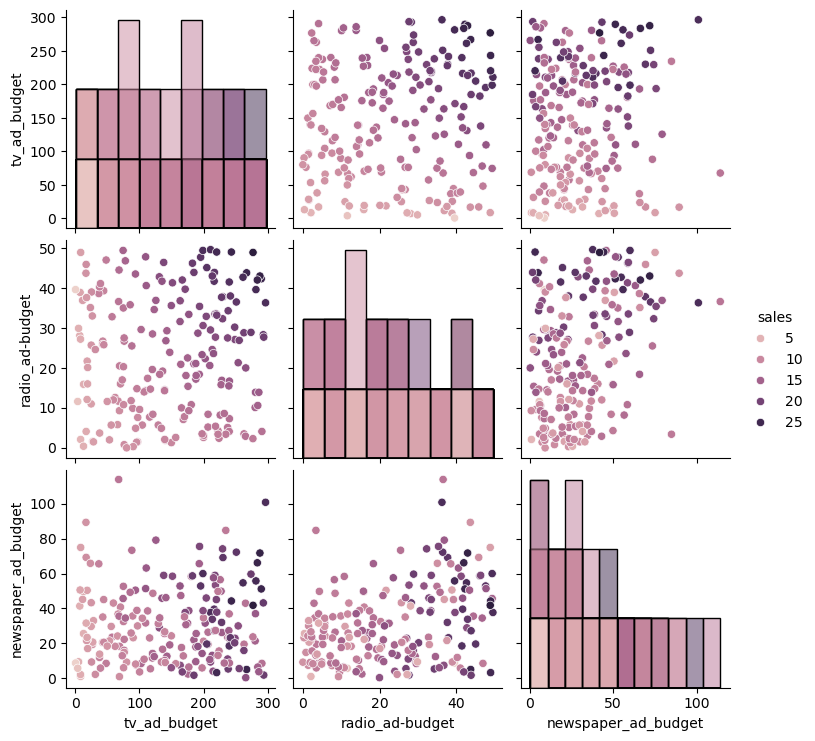

In [71]:
sns.pairplot(df, hue="sales",  diag_kind = "hist")

* Here, Tv shows positive correlation
* Radio is also showing positive but lower than TV

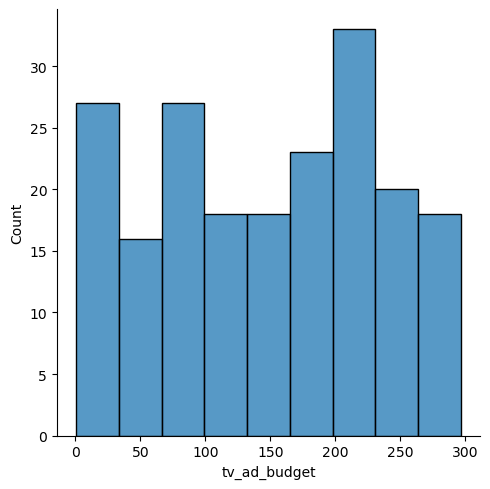

In [73]:
sns.displot(x = df["tv_ad_budget"])

<Axes: xlabel='tv_ad_budget', ylabel='Count'>

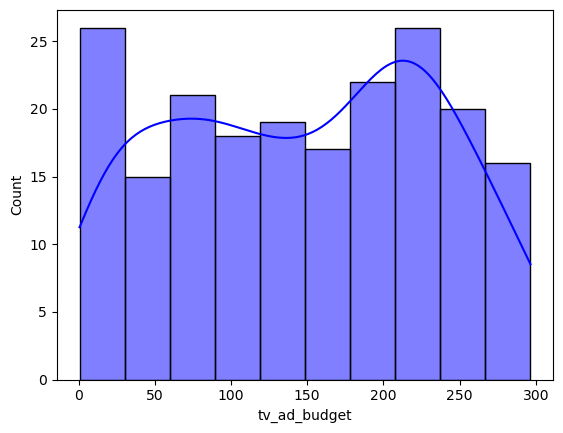

In [74]:
sns.histplot(df["tv_ad_budget"], kde=True, bins=10, color="blue")

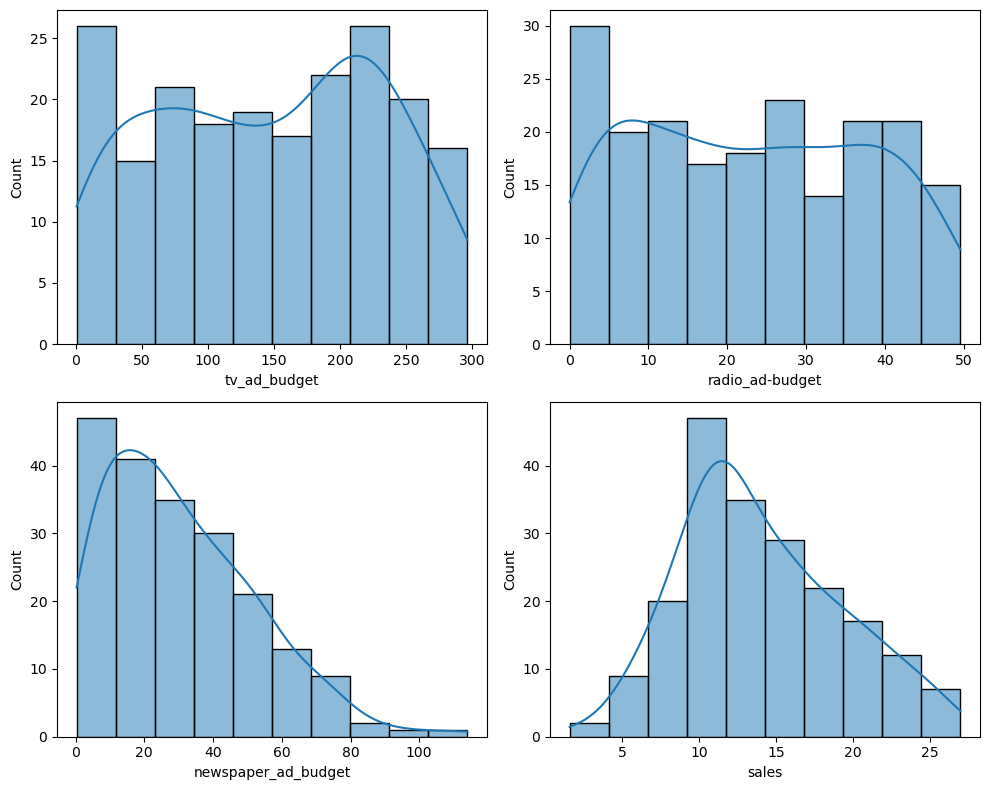

In [75]:
plt.figure(figsize = (10,8))

for index, col in enumerate(df.columns, start =1):
    plt.subplot(2,2,index)
    sns.histplot(x = df[col],kde= True, bins =10)

plt.tight_layout()
plt.show()

In [76]:
corr_matrix = df.corr()
corr_matrix

,tv_ad_budget,radio_ad-budget,newspaper_ad_budget,sales
tv_ad_budget,1.000000,0.054809,0.056648,0.782224
radio_ad-budget,0.054809,1.000000,0.354104,0.576223
newspaper_ad_budget,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

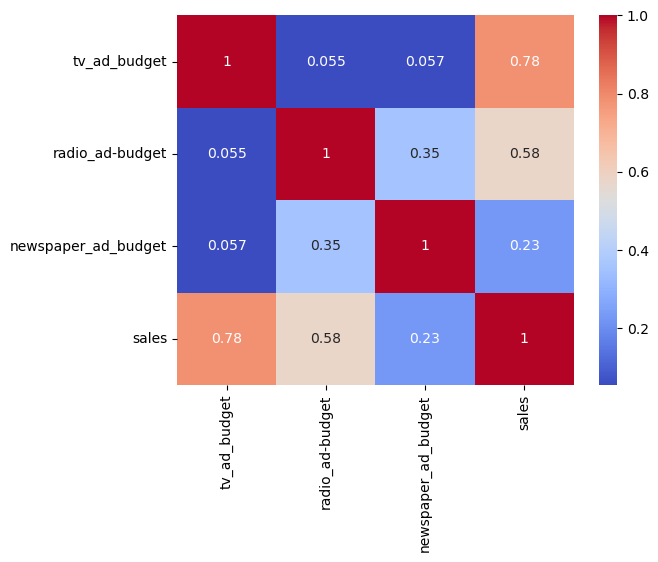

In [77]:
sns.heatmap(data= corr_matrix, cmap = "coolwarm", annot = True)

+ TV sales put more impact on net revenue

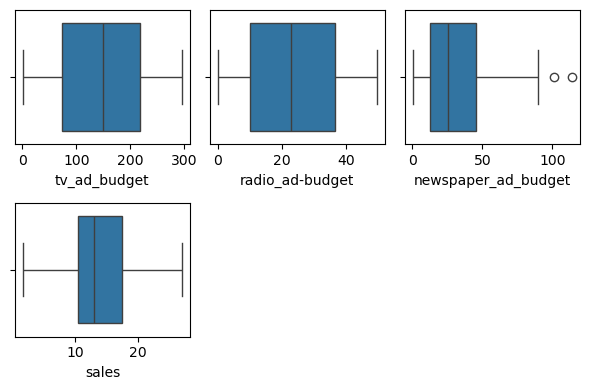

In [79]:
plt.figure(figsize = (6,4))

for index, col in enumerate(df.columns, start = 1):
    plt.subplot(2,3,index)
    sns.boxplot(x = df[col])
plt.tight_layout()
plt.show()

* Tv_ad_budget is having normalization
* Newspaper_ad_budget has outlier

## Observation from the Visualisation
*
*

In [125]:
# Spliting the data into Dependent and Independent Variable

x = df.drop(columns= ["sales"], axis = 1)
y = df["sales"]


In [143]:
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.2, random_state=42)

In [145]:
# Initialize and train the model

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [147]:
# Predict on Test Data

y_pred = model.predict(x_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [149]:
# checking the Prediction 

df1= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
115,12.6,13.105592
69,22.3,21.057192
170,8.4,7.461010
174,11.5,13.606346
45,14.9,15.155070


In [163]:
# Model Evaluation

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)


0.899438024100912

In [167]:
print(f"r2 score:{r2}")
print(f"mae score:{mae}")
print(f"mse score:{mse}")
print(f"rmse score:{rmse}")

r2 score:0.899438024100912
mae score:1.4607567168117606
mse score:3.1740973539761046
rmse score:1.7815996615334502


In [169]:
# Predict on Train Data

y_train_pred=model.predict(x_train)


In [175]:
df2 = pd.DataFrame({"actual": y_train, "predicted": y_train_pred})
df2

,actual,predicted
79,11.0,9.688275
197,12.8,12.673377
38,10.1,10.055333
24,9.7,8.200102
122,11.6,13.495621
...,...,...
106,7.2,6.260456
14,19.0,18.459890
92,19.4,19.217623
179,12.6,12.326822


In [ ]:
# Model Evaluation on Train Data

mse = mean_squared_error(x_test, x_pred)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_tes, y_pred)